In [1]:
import matplotlib.pyplot as plt
import numpy as np
from muca.model.p_body_ising import PBodyTwoDimIsing
from muca.algorithm.wang_landau import WangLandau
from muca.algorithm.parameters import WangLandauParameters
from muca.results.analysis import Analyzer

In [2]:
p = 4
L = 8
S = 2
num_trials = 5

In [3]:
result_metropolis_normal = []
for _ in range(num_trials):
    result_metropolis_normal.append(
        WangLandau.run(
            model=PBodyTwoDimIsing(J=-1, p=p, Lx=L, Ly=L, spin=S, spin_scale_factor=1/S),
            parameters=WangLandauParameters(
                modification_criterion=1e-08,
                convergence_check_interval=100,
                num_divided_energy_range=1,
                overlap_rate = 0.4,
                flatness_criterion = 0.9,
            ),
            num_threads=1,
            backend = "cpp",
            calculate_order_parameters=False,
        )
    )

Running Wang-Landau simulation by cpp ...
Done simulation (145.7) [sec] by cpp
Running Wang-Landau simulation by cpp ...
Done simulation (126.2) [sec] by cpp
Running Wang-Landau simulation by cpp ...
Done simulation (133.9) [sec] by cpp
Running Wang-Landau simulation by cpp ...
Done simulation (136.2) [sec] by cpp
Running Wang-Landau simulation by cpp ...
Done simulation (162.3) [sec] by cpp


In [4]:
result_metropolis_symm = []
for _ in range(num_trials):
    result_metropolis_symm.append(
        WangLandau.run(
            model=PBodyTwoDimIsing(J=-1, p=p, Lx=L, Ly=L, spin=S, spin_scale_factor=1/S),
            parameters=WangLandauParameters(
                modification_criterion=1e-08,
                convergence_check_interval=100,
                num_divided_energy_range=1,
                overlap_rate = 0.4,
                flatness_criterion = 0.9,
            ),
            num_threads=1,
            backend = "cpp",
            calculate_order_parameters=False,
            symmetric_calculation=True
        )
    )

Running symmetric Wang-Landau simulation by cpp ...
Done simulation (44.0) [sec] by cpp
Running symmetric Wang-Landau simulation by cpp ...
Done simulation (62.6) [sec] by cpp
Running symmetric Wang-Landau simulation by cpp ...
Done simulation (51.0) [sec] by cpp
Running symmetric Wang-Landau simulation by cpp ...
Done simulation (39.2) [sec] by cpp
Running symmetric Wang-Landau simulation by cpp ...
Done simulation (37.1) [sec] by cpp


Text(0, 0.5, 'Time [s]')

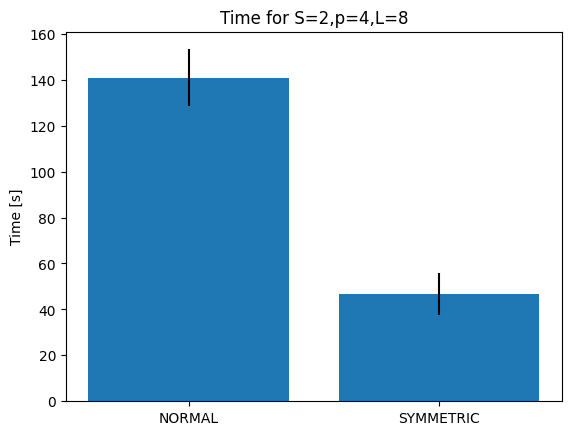

In [5]:
plt.title(f"Time for S={S},p={p},L={L}")
plt.bar(
    [
        "NORMAL", 
        "SYMMETRIC"
    ],
    [
        np.mean([r.info["total_time"] for r in result_metropolis_normal]),
        np.mean([r.info["total_time"] for r in result_metropolis_symm])
    ],
    yerr=[

        np.std([r.info["total_time"] for r in result_metropolis_normal]),
        np.std([r.info["total_time"] for r in result_metropolis_symm])
    ]
)
plt.ylabel("Time [s]")

Text(0, 0.5, 'Sweeps')

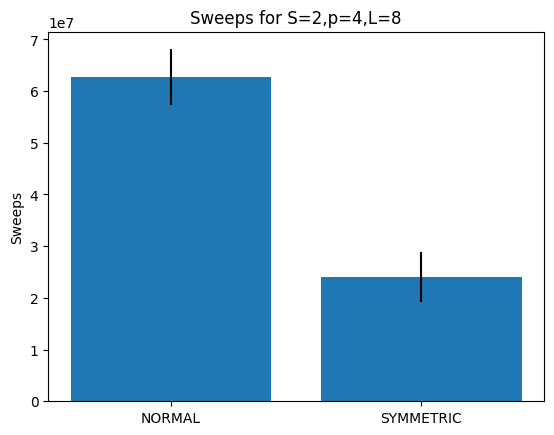

In [6]:
plt.title(f"Sweeps for S={S},p={p},L={L}")
plt.bar(
    [
        "NORMAL", 
        "SYMMETRIC"
    ],
    [
        np.mean([r.total_sweeps for r in result_metropolis_normal]),
        np.mean([r.total_sweeps for r in result_metropolis_symm])
    ],
    yerr=[

        np.std([r.total_sweeps for r in result_metropolis_normal]),
        np.std([r.total_sweeps for r in result_metropolis_symm])
    ]
)
plt.ylabel("Sweeps")